In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [35]:
data=pd.read_csv('heart_diea.csv')

In [36]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [38]:
data.shape

(4238, 16)

In [39]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [40]:
data['education'].value_counts()

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64

Education vs TenYearCHD

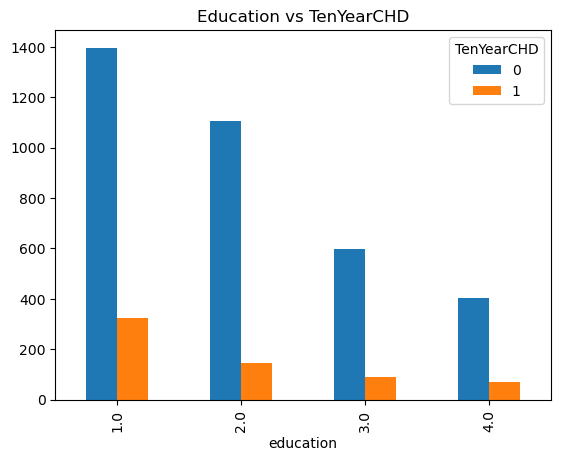

In [44]:
pd.crosstab(data['education'],data['TenYearCHD']).plot(kind='bar', title="Education vs TenYearCHD")
plt.show()

And thus, we see that there is no relationship between the Education and TenYearCHD features.

In [45]:
data.drop(labels=['education'], axis=1,inplace=True)

In [46]:
data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [47]:
data.head(15)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [49]:
data.isna().sum().sort_values(ascending=False)


glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [52]:
count_nulls

0       0
1       0
2       0
3       0
4       0
       ..
4233    0
4234    0
4235    1
4236    1
4237    0
Length: 4238, dtype: int64

In [64]:
count_nulls=data.isna().sum(axis=1)
count_null_values=0
for i in count_nulls:
    if i>0:
        count_null_values+=1
print('Total number of rows with missing values is ', count_null_values)
print('since it is only',round((count_null_values/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

data.dropna(axis=0,inplace=True)


Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


<Axes: title={'center': 'Diabetes vs TenYearCHD'}, xlabel='diabetes'>

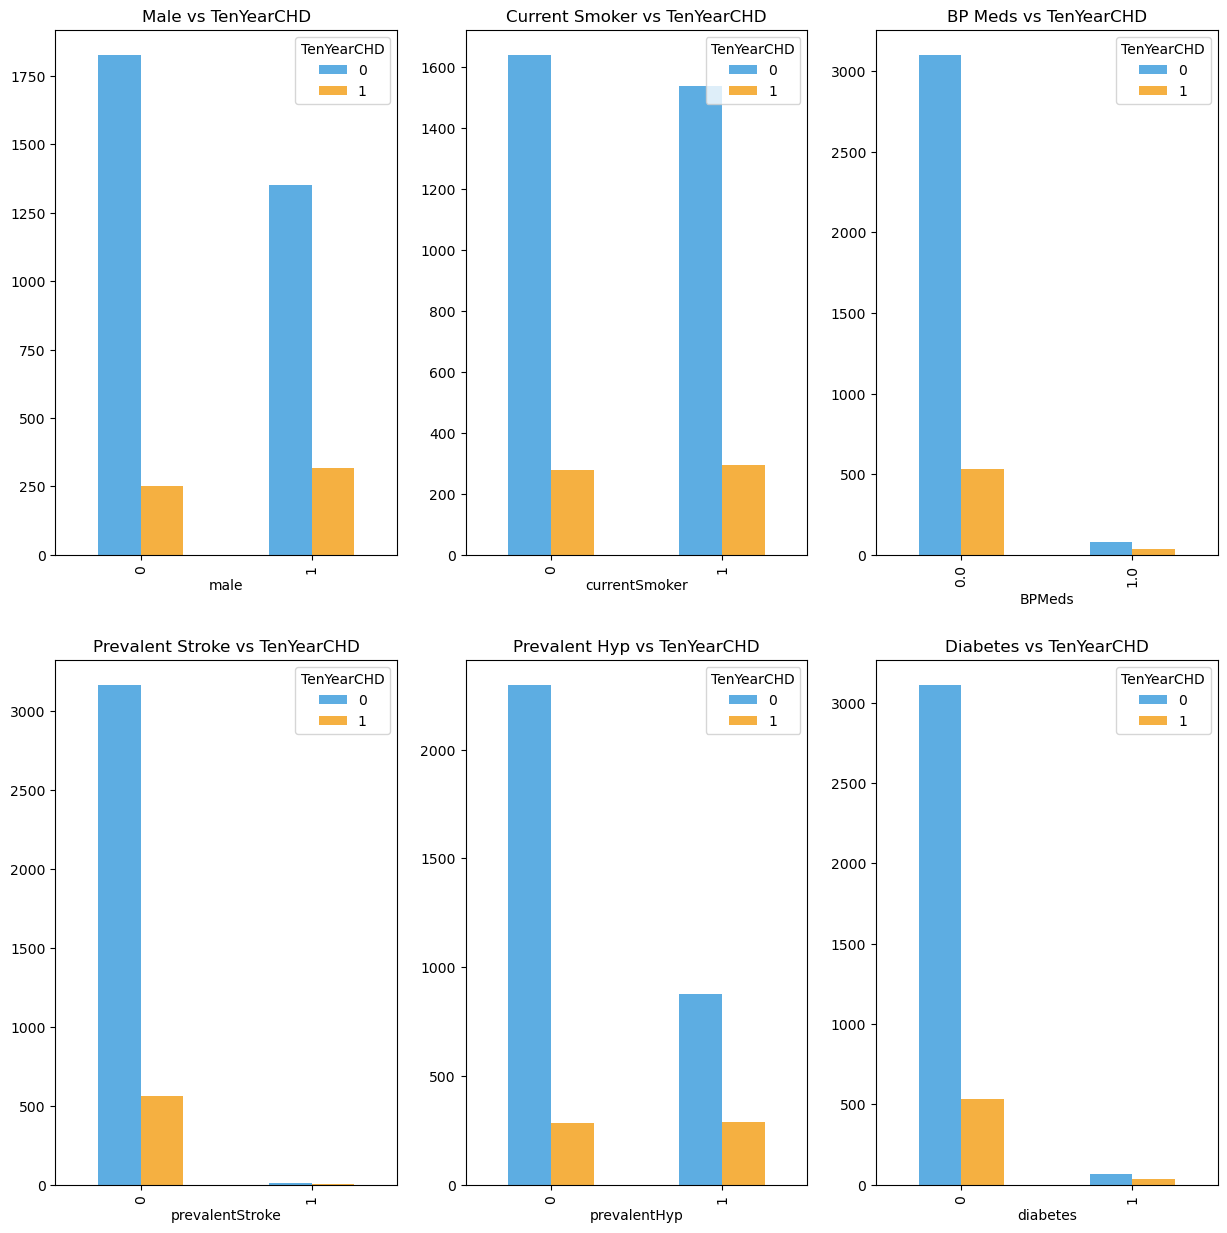

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Plot each crosstab in a different subplot
pd.crosstab(data['male'], data['TenYearCHD']).plot(kind='bar', ax=axes[0, 0], color=['#5DADE2', '#F5B041'], title="Male vs TenYearCHD")
pd.crosstab(data['currentSmoker'], data['TenYearCHD']).plot(kind='bar', ax=axes[0, 1], color=['#5DADE2', '#F5B041'], title="Current Smoker vs TenYearCHD")
pd.crosstab(data['BPMeds'], data['TenYearCHD']).plot(kind='bar', ax=axes[0, 2], color=['#5DADE2', '#F5B041'], title="BP Meds vs TenYearCHD")
pd.crosstab(data['prevalentStroke'], data['TenYearCHD']).plot(kind='bar', ax=axes[1, 0], color=['#5DADE2', '#F5B041'], title="Prevalent Stroke vs TenYearCHD")
pd.crosstab(data['prevalentHyp'], data['TenYearCHD']).plot(kind='bar', ax=axes[1, 1], color=['#5DADE2', '#F5B041'], title="Prevalent Hyp vs TenYearCHD")
pd.crosstab(data['diabetes'], data['TenYearCHD']).plot(kind='bar', ax=axes[1,2], color=['#5DADE2', '#F5B041'], title="Diabetes vs TenYearCHD")

In [67]:
data.groupby('TenYearCHD')[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].mean()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.737488,8.72175,235.260623,130.306106,82.178313,25.664271,75.588920,80.625748
1,54.251748,10.58042,246.351399,143.806818,87.129371,26.617115,76.342657,88.867133


In [69]:
X=data.drop(['TenYearCHD'],axis=1)
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [70]:
y=data['TenYearCHD']

In [71]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [74]:
len(x_train), len(x_test)



(2999, 750)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [77]:

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [78]:
predict_heart_disease_model=LogisticRegression()
predict_heart_disease_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [79]:
predict_heart_disease_model.score(x_test_scaled,y_test)


0.84

In [80]:
y_predicted=predict_heart_disease_model.predict(x_test_scaled)
CM=confusion_matrix(y_test,y_predicted)
CM

array([[622,   5],
       [115,   8]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

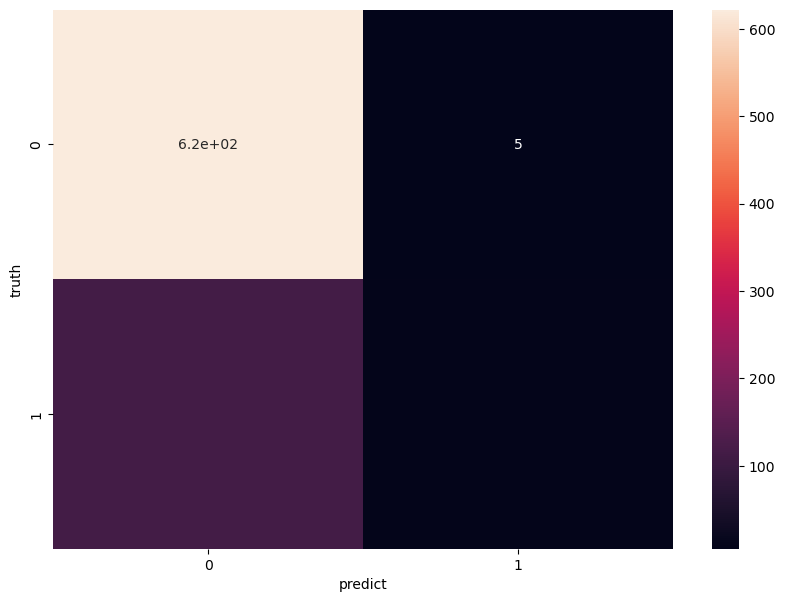

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(CM,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')